In [1]:
import re
import nltk
import math
from nltk import FreqDist
from nltk import tokenize
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import sentence_polarity 
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hotelReviews1.csv',sep=',',
                 header=0,usecols = ['reviews.text','reviews.rating'])
df.head()

,reviews.text,reviews.rating
0,Our experience at Rancho Valencia was absolute...,5.0
1,Amazing place. Everyone was extremely warm and...,5.0
2,We booked a 3 night stay at Rancho Valencia to...,5.0
3,Currently in bed writing this for the past hr ...,2.0
4,I live in Md and the Aloft is my Home away fro...,5.0


In [3]:
df['reviews.rating'] = df['reviews.rating'].apply(lambda x: round(x)*10/10.0)

In [4]:
###############################data visulaziton#################

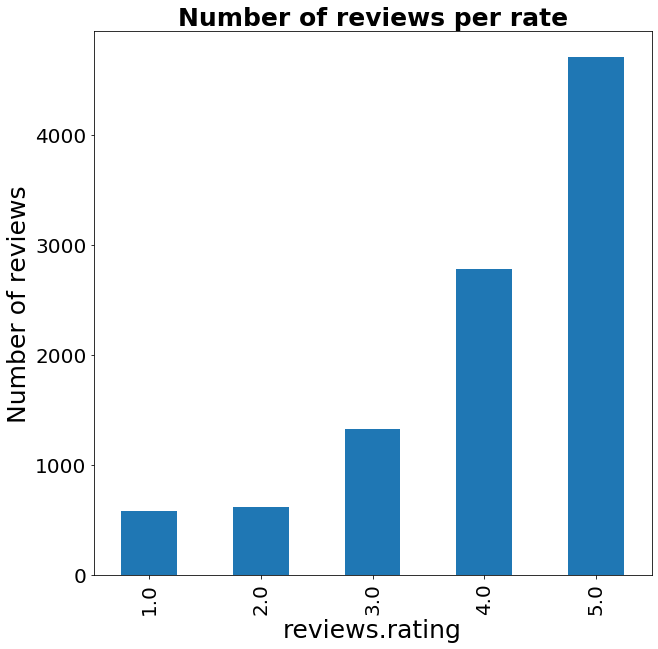

In [38]:
##########review number per rate##################
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(fontsize=20) # 
plt.yticks(fontsize=20) 
ax.set_title('Number of reviews per rate', fontweight="bold", size=25)
ax.set_ylabel('Number of reviews', fontsize = 25) 
ax.set_xlabel('rate', fontsize = 25) 
df.groupby(['reviews.rating']).count()['reviews.text'].plot(ax=ax, kind='bar')

In [ ]:
#############reveiw length per rate#################

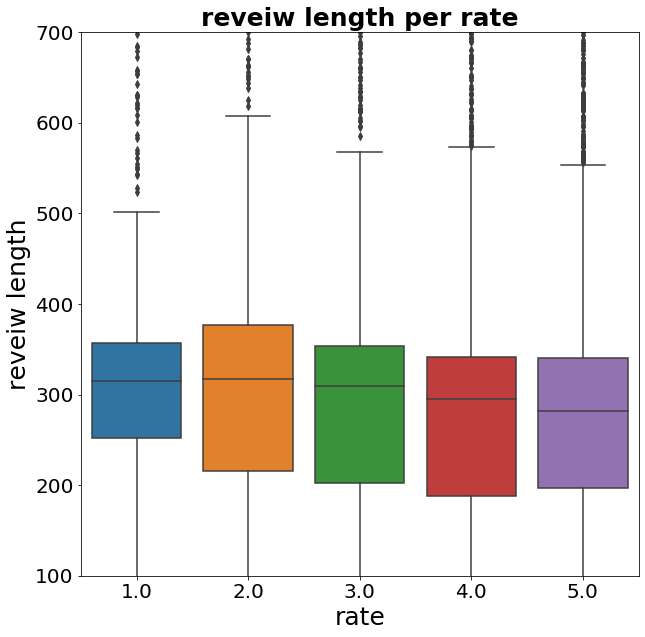

In [40]:
df['reviews.text'] = df['reviews.text'].astype(str)
df = df.assign(review_length = df['reviews.text'].apply(len))
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='reviews.rating', y='review_length', data=df)
plt.xticks(fontsize=20) # X Ticks
plt.yticks(fontsize=20) # Y Ticks
ax.set(ylim=(100, 700))
ax.set_title('reveiw length per rate', fontweight="bold", size=25) # Title
ax.set_ylabel('reveiw length', fontsize = 25) 
ax.set_xlabel('rate', fontsize = 25) # X label
plt.show()

In [ ]:
#################

In [317]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 
rate_1 = df[df["reviews.rating"]>=1][df["reviews.rating"]<2]
rate_2 = df[df["reviews.rating"]>=2][df["reviews.rating"]<3]
rate_3=df[df["reviews.rating"]>=3][df["reviews.rating"]<4]
rate_4=df[df["reviews.rating"]>=4][df["reviews.rating"]<5]
rate_5=df[df["reviews.rating"]>=5][df["reviews.rating"]<6]

/Users/jonywoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jonywoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/jonywoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/jonywoo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


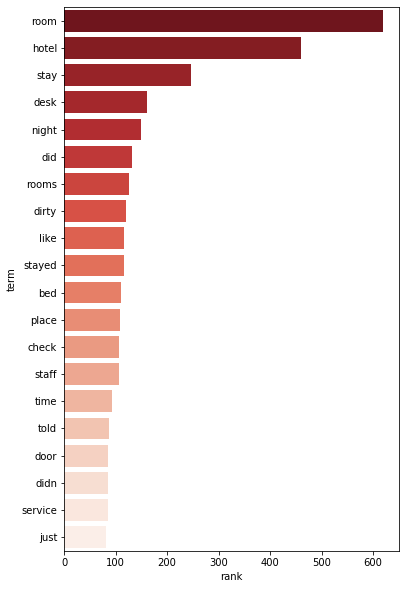

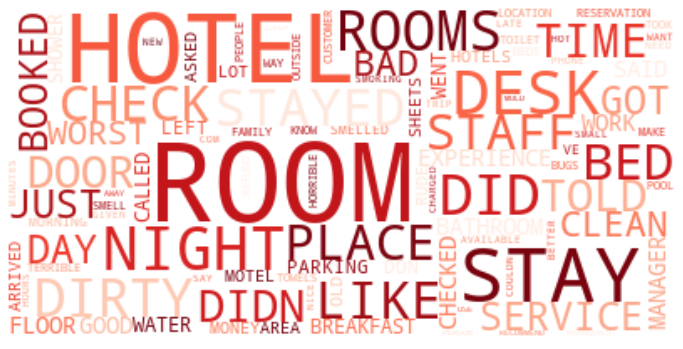

In [416]:
from wordcloud import WordCloud
def rank_words(terms, feature_matrix):
    sums = feature_matrix.sum(axis=0)
    data = []
    for col, term in enumerate(terms):
        data.append( (term, sums[0,col]) )
    ranked = pd.DataFrame(data, columns=['term','rank']).sort_values('rank', ascending=False)
    return ranked
def runRankBar(pd):
    tfidf = vectorizer.fit_transform(pd)
    ranked = rank_words(terms=vectorizer.get_feature_names(), feature_matrix=tfidf)
    
    fig, ax = plt.subplots(figsize=(6,10), ncols=1, nrows=1)
    sns.barplot(x='rank',y='term',data=ranked[:20], palette='Reds_r', ax=ax)
    plt.show()
    dic = {ranked.loc[i,'term'].upper(): ranked.loc[i,'rank'] for i in range(0,len(ranked))}
    wordcloud = WordCloud(background_color='white',
                          max_words=100,
                          colormap='Reds').generate_from_frequencies(dic)
    fig = plt.figure(1,figsize=(12,15))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis('off')
    plt.show()
runRankBar(rate_1["reviews.text"])

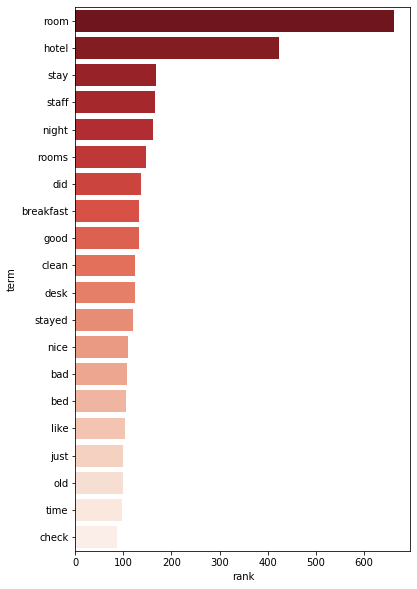

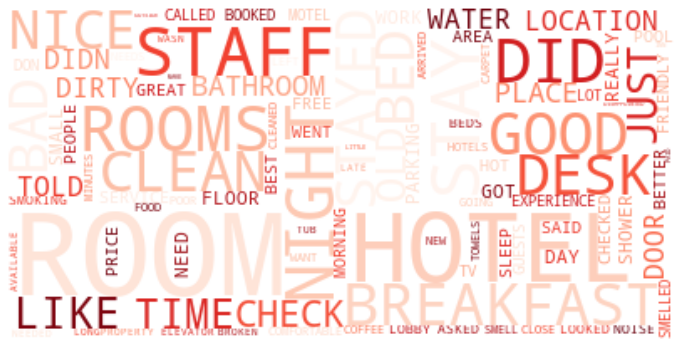

In [417]:
runRankBar(rate_2["reviews.text"])

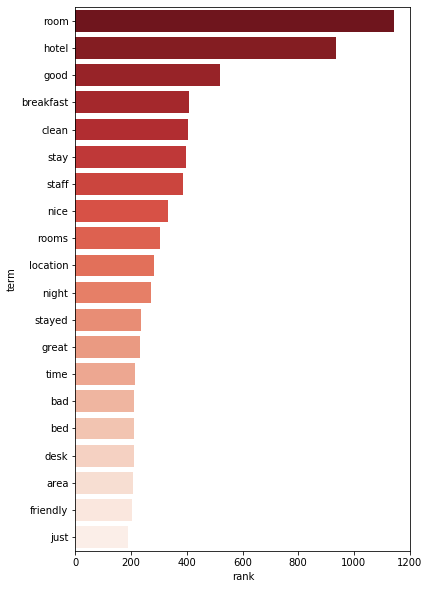

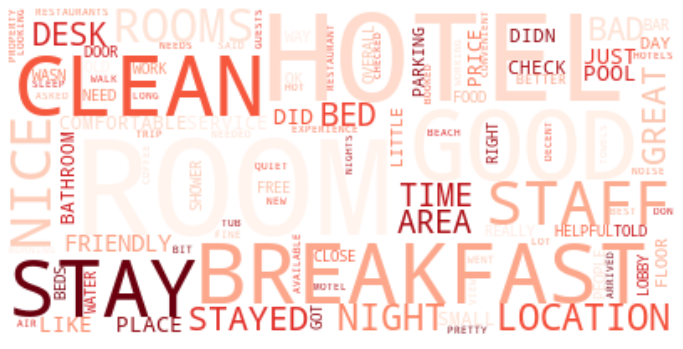

In [418]:
runRankBar(rate_3["reviews.text"])

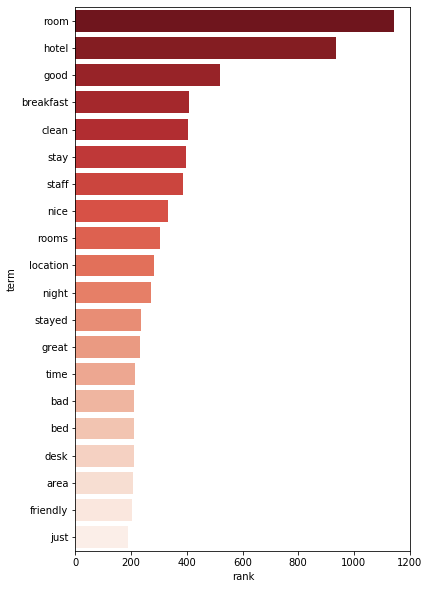

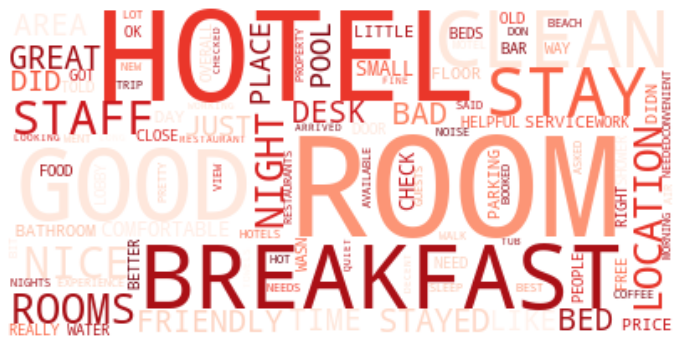

In [419]:
runRankBar(rate_3["reviews.text"])

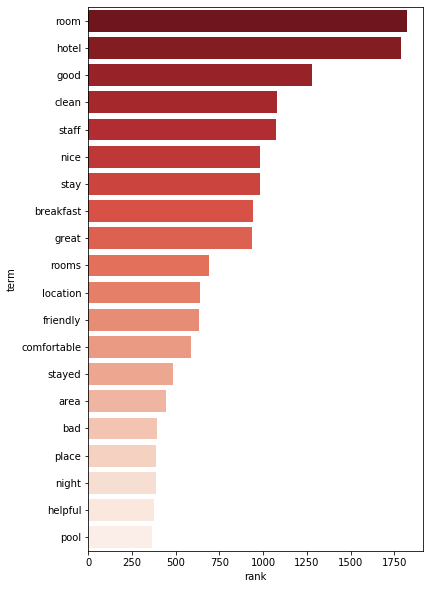

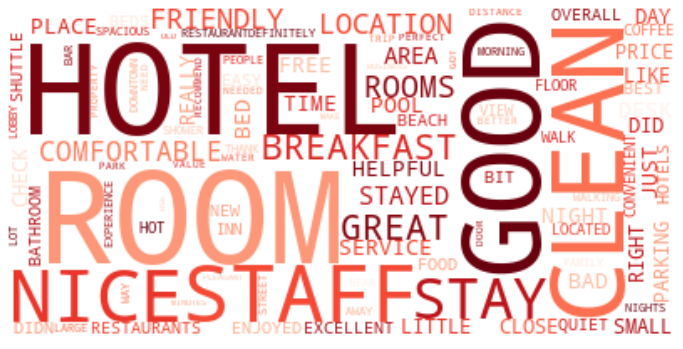

In [420]:
runRankBar(rate_4["reviews.text"])

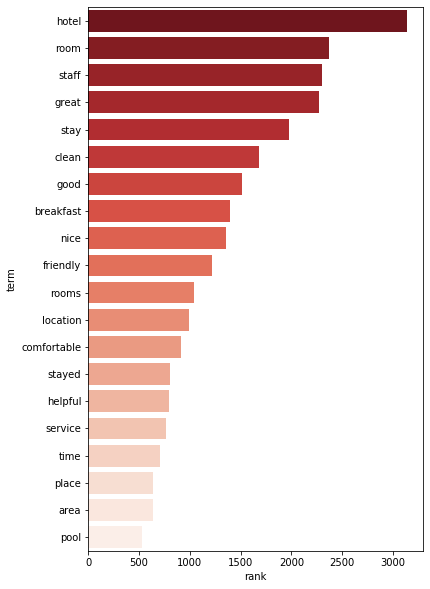

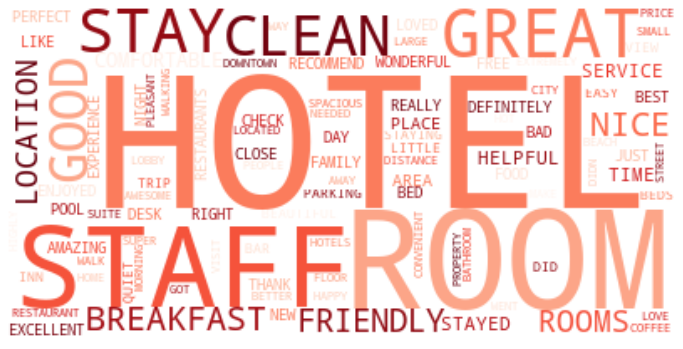

In [421]:
runRankBar(rate_5["reviews.text"])

In [6]:
df['reviews.rating'] = df['reviews.rating'].astype(int)

In [7]:
df['reviews.text'] = df['reviews.text'].astype(str)

In [8]:
text = df['reviews.text'].values
rating = df['reviews.rating'].values
print(text[2])
print(rating[:30])
print(len(text))

We booked a 3 night stay at Rancho Valencia to play some tennis, since it is one of the highest rated tennis resorts in America. This place is really over the top from a luxury standpoint and overall experience. The villas are really perfect, the staff is great, attention to details (includes fresh squeezed orange juice each morning), restaurants, bar and room service amazing, and the tennis program was really impressive as well. We will want to come back here again.
[5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 4 5 3 5 4 5 5 5 4 5 3 1 1 4 5]
10000


In [109]:
#rating = [0 if item < 3 else 1 for item in rating]

In [9]:
# function for tokenization and lowercase
def tokenize(sent):
    return nltk.word_tokenize(sent.lower())

# function for removing non-alpha words and doing lowercase
def is_alpha(w):
    pattern = re.compile('^[^a-z]+$')
    if not pattern.match(w):
        return True
    return False

# function for removing stopwords
stopwords = nltk.corpus.stopwords.words('english')
negationwords = ['no','not','never','none','nowhere','nothing','noone','but','againt'
                 'rather','hardly','scarcely','rarely','seldom','neither','nor']
newstopwords = [word for word in stopwords if word not in negationwords]

def remove_stopwords(w):
    if w not in newstopwords:
        return True
    return False
    
# function for lemmatizing
lm = nltk.stem.WordNetLemmatizer() 
def lemmatizer(w):        
    return lm.lemmatize(w) 
    
# function for applying on sentence list
def pre_processing(sent):
    clean_wordset = []
    tokenized_wordset = tokenize(sent)
    for w in tokenized_wordset:
        if(is_alpha(w) and remove_stopwords(w)):
            clean_wordset.append(lemmatizer(w))
    return clean_wordset

In [10]:
sentence = [pre_processing(sent) for sent in text]
print(text[0])
print(sentence[0])

Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!! We felt special and very happy during our stayed. I would come back in a heart beat!!!
['experience', 'rancho', 'valencia', 'absolutely', 'perfect', 'beginning', 'end', 'felt', 'special', 'happy', 'stayed', 'would', 'come', 'back', 'heart', 'beat']


In [116]:
import random
documents = [(sentence[i], rating[i]) 
             for i in range(0,len(text))]
random.shuffle(documents)
print(documents[:3])
all_words_list = [word for (sent,rate) in documents for word in sent]
all_words = nltk.FreqDist(all_words_list)
print(len(all_words_list))
word_items = all_words.most_common(2500)
word_features_freq = [word for (word,count) in word_items]
print(len(word_features_freq))

[(['ac', 'died', 'house', 'used', 'hilton', 'honor', 'reward', 'get', 'great', 'rate', 'general', 'manager', 'personally', 'called', 'make', 'sure', 'stay', 'going', 'well', 'fantastic', 'service'], 5.0), (['wife', 'wanted', 'stay', 'hotel', 'beach', 'smoking', 'accomodations', 'inside', 'room', 'found', 'hotel', 'not', 'comfortable', 'but', 'clean', 'spacious', 'reminded', 'u', 'stay', 'residence', 'inn', 'california', 'would', 'definately', 'recommend', 'others', 'location'], 5.0), (['place', 'outstanding', 'people', 'treat', 'like', 'gold', 'happy', 'entire', 'experience', 'karl', 'awesome', 'job', 'setting', 'everything', 'u', 'every', 'time', 'came', 'beach', 'no', 'matter', 'needed', 'helpful', 'outstanding', 'customer', 'service', 'also', 'gave', 'u', 'lot', 'input', 'place'], 5.0)]
314910
2500


In [117]:
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features
featuresets = [(document_features(d, word_features_freq), r) for (d, r) in documents]
featuresets[:3]

[({'contains(room)': False,
   'contains(hotel)': False,
   'contains(staff)': False,
   'contains(not)': False,
   'contains(stay)': True,
   'contains(but)': False,
   'contains(great)': True,
   'contains(good)': False,
   'contains(clean)': False,
   'contains(breakfast)': False,
   'contains(nice)': False,
   "contains(n't)": False,
   'contains(friendly)': False,
   'contains(would)': False,
   'contains(location)': False,
   'contains(bed)': False,
   'contains(night)': False,
   'contains(time)': False,
   'contains(stayed)': False,
   'contains(u)': False,
   'contains(comfortable)': False,
   'contains(place)': False,
   'contains(one)': False,
   'contains(no)': False,
   "contains('s)": False,
   'contains(area)': False,
   'contains(service)': True,
   'contains(helpful)': False,
   'contains(desk)': False,
   'contains(well)': True,
   'contains(bad)': False,
   'contains(pool)': False,
   'contains(front)': False,
   'contains(get)': True,
   'contains(could)': False,
  

In [118]:
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print("Accuracy of using commonwords: ")
print(nltk.classify.accuracy(classifier, test_set))

Accuracy of using commonwords: 
0.544


In [11]:
# function for removing non-alpha words and doing lowercase
def is_alpha(sent):
    pattern = re.compile('^[^a-z]+$')
    text_clean = [w for w in sent if not pattern.match(w)]
    return text_clean

# function for removing stopwords
def remove_stopwords(sent):
    return [w for w in sent if w not in newstopwords]

# function for lemmatizing
def lemmatizer(sent):
    list = []
    for w in sent:
        list.append(lm.lemmatize(w))
    return list

df['text'] = df['reviews.text'].apply(lambda x: word_tokenize(x.lower()))
df['text'] = df['text'].apply(lambda x: is_alpha(x))
df['text'] = df['text'].apply(lambda x:remove_stopwords(x))
df['text'] = df['text'].apply(lambda x:lemmatizer(x))
df['text'] = [' '.join(sent) for sent in df['text']]
text = df['text'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, rating, test_size = 0.20)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

(8000,) (8000,) (2000,) (2000,)
best place stay lafayette april next year really looking forward close shop restaurant coarse festival highlight trip.there also vermillionville park many area interest
5
pro fair price free wifi strong enough make voice call breakfast sandwich beer downstairs proximity snowshoe satellite tv comfortable bed nice view con could bit cleaner mainly dusting but no big complaint came ski weekend able make relatively last
4


In [13]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [ ]:
#######################bayes############################################

In [22]:
#####unigram################
from sklearn.feature_extraction.text import TfidfVectorizer
uni_vect = TfidfVectorizer(ngram_range=(1,1),min_df=20,max_df=0.8)
X_bayes_train = uni_vect.fit_transform(X_train)
print(X_bayes_train[0].toarray())
print(len(uni_vect.vocabulary_))
print(list(uni_vect.vocabulary_.items())[:5])
print(X_bayes_train.shape)

[[0. 0. 0. ... 0. 0. 0.]]
1472
[('found', 520), ('hotel', 630), ('conveniently', 301), ('located', 732), ('decorated', 344)]
(8000, 1472)


In [23]:
from sklearn.naive_bayes import MultinomialNB
clf_bayes = MultinomialNB()
clf_bayes.fit(X_bayes_train,y_train)
train_score = clf_bayes.score(X_bayes_train,y_train)

In [24]:
X_bayes_test = uni_vect.transform(X_test)
y_bayes_pred = clf_bayes.predict(X_bayes_test)

In [25]:
from sklearn.metrics import classification_report
target_names = ['1.0','2.0','3.0','4.0','5.0']
print(classification_report(y_test, y_bayes_pred,target_names=target_names))

              precision    recall  f1-score   support

         1.0       0.70      0.36      0.48       119
         2.0       0.35      0.06      0.11       111
         3.0       0.33      0.15      0.20       296
         4.0       0.39      0.28      0.33       558
         5.0       0.61      0.92      0.73       916

    accuracy                           0.55      2000
   macro avg       0.48      0.35      0.37      2000
weighted avg       0.50      0.55      0.49      2000



In [ ]:
#####bigram################

In [101]:
bi_vect = TfidfVectorizer(ngram_range=(2,2),min_df=20,max_df=0.8)
X_bayes_train = bi_vect.fit_transform(X_train)
clf_bayes = MultinomialNB()
clf_bayes.fit(X_bayes_train,y_train)
X_bayes_test = bi_vect.transform(X_test)
y_bayes_pred = clf_bayes.predict(X_bayes_test)
print(classification_report(y_test, y_bayes_pred,target_names=target_names))

              precision    recall  f1-score   support

         1.0       0.60      0.23      0.33       121
         2.0       0.38      0.05      0.08       127
         3.0       0.36      0.16      0.22       245
         4.0       0.44      0.29      0.35       539
         5.0       0.58      0.88      0.70       968

    accuracy                           0.54      2000
   macro avg       0.47      0.32      0.34      2000
weighted avg       0.50      0.54      0.48      2000



In [ ]:
#using both unigram and bigram

In [105]:
ubi_vect = TfidfVectorizer(ngram_range=(1,2),min_df=20,max_df=0.8)
X_bayes_train = ubi_vect.fit_transform(X_train)
clf_bayes = MultinomialNB()
clf_bayes.fit(X_bayes_train,y_train)
X_bayes_test = ubi_vect.transform(X_test)
y_bayes_pred = clf_bayes.predict(X_bayes_test)
print(classification_report(y_test, y_bayes_pred,target_names=target_names))

              precision    recall  f1-score   support

         1.0       0.72      0.32      0.45       121
         2.0       0.33      0.04      0.07       127
         3.0       0.37      0.24      0.29       245
         4.0       0.42      0.34      0.37       539
         5.0       0.64      0.89      0.74       968

    accuracy                           0.57      2000
   macro avg       0.50      0.36      0.38      2000
weighted avg       0.53      0.57      0.53      2000



In [103]:
####################################Random forest##################################################
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [106]:
rf = RandomForestClassifier(n_estimators=200)
X_rf_train = uni_vect.fit_transform(X_train)
X_rf_test = uni_vect.transform(X_test)
rf.fit(X_rf_train, y_train)
y_rfpred = rf.predict(X_rf_test)
cr_rf=classification_report(y_test,y_rfpred,target_names=target_names)
print(cr_rf)

              precision    recall  f1-score   support

         1.0       0.66      0.36      0.47       121
         2.0       0.38      0.04      0.07       127
         3.0       0.25      0.09      0.14       245
         4.0       0.34      0.25      0.29       539
         5.0       0.60      0.90      0.72       968

    accuracy                           0.54      2000
   macro avg       0.45      0.33      0.34      2000
weighted avg       0.48      0.54      0.48      2000



In [123]:
#####over sampling balenced data
from imblearn.over_sampling import SMOTE
X_rf_train = uni_vect.fit_transform(X_train)
X_rf_test = uni_vect.transform(X_test)
X_rf_train1, y_rf_train1 = SMOTE().fit_resample(X_rf_train, y_train)
X_rf_test1, y_rf_test1 = SMOTE().fit_resample(X_rf_test, y_test)
rf.fit(X_rf_train1, y_rf_train1)
y_rfpred = rf.predict(X_rf_test1)
cr_rf=classification_report(y_rf_test1,y_rfpred,target_names=target_names)
print(cr_rf)

              precision    recall  f1-score   support

         1.0       0.61      0.65      0.63       968
         2.0       0.49      0.39      0.43       968
         3.0       0.37      0.28      0.32       968
         4.0       0.39      0.36      0.38       968
         5.0       0.54      0.79      0.64       968

    accuracy                           0.49      4840
   macro avg       0.48      0.49      0.48      4840
weighted avg       0.48      0.49      0.48      4840



In [ ]:
#####using bigram######

In [96]:
bi_vect = TfidfVectorizer(ngram_range=(2,2),min_df=20,max_df=0.8)
X_rf_train = bi_vect.fit_transform(X_train)
X_rf_test = bi_vect.transform(X_test)
rf.fit(X_rf_train, y_train)
y_rfpred = rf.predict(X_rf_test)
cr_rf=classification_report(y_test,y_rfpred,target_names=target_names)
print(cr_rf)

              precision    recall  f1-score   support

         1.0       0.35      0.28      0.31       121
         2.0       0.23      0.06      0.10       127
         3.0       0.27      0.16      0.20       245
         4.0       0.37      0.28      0.32       539
         5.0       0.59      0.80      0.68       968

    accuracy                           0.50      2000
   macro avg       0.36      0.32      0.32      2000
weighted avg       0.45      0.50      0.46      2000



In [124]:
####balenced data
bi_vect = TfidfVectorizer(ngram_range=(2,2),min_df=20,max_df=0.8)
X_rf_train = bi_vect.fit_transform(X_train)
X_rf_test = bi_vect.transform(X_test)
X_rf_train1, y_rf_train1 = SMOTE().fit_resample(X_rf_train, y_train)
X_rf_test1, y_rf_test1 = SMOTE().fit_resample(X_rf_test, y_test)
rf.fit(X_rf_train1, y_rf_train1)
y_rfpred = rf.predict(X_rf_test1)
cr_rf=classification_report(y_rf_test1,y_rfpred,target_names=target_names)
print(cr_rf)

              precision    recall  f1-score   support

         1.0       0.43      0.40      0.42       968
         2.0       0.32      0.37      0.34       968
         3.0       0.28      0.24      0.26       968
         4.0       0.33      0.28      0.30       968
         5.0       0.46      0.55      0.50       968

    accuracy                           0.37      4840
   macro avg       0.36      0.37      0.36      4840
weighted avg       0.36      0.37      0.36      4840



In [284]:
#using both unigram and bigram

In [93]:
ubi_vect = TfidfVectorizer(ngram_range=(1,2),min_df=20,max_df=0.8)
X_rf_train = ubi_vect.fit_transform(X_train)
X_rf_test = ubi_vect.transform(X_test)
rf.fit(X_rf_train, y_train)
y_rfpred = rf.predict(X_rf_test)
cr_rf=classification_report(y_test,y_rfpred,target_names=target_names)
print(cr_rf)

              precision    recall  f1-score   support

         1.0       0.65      0.34      0.45       121
         2.0       0.42      0.04      0.07       127
         3.0       0.33      0.12      0.18       245
         4.0       0.35      0.24      0.29       539
         5.0       0.60      0.90      0.72       968

    accuracy                           0.54      2000
   macro avg       0.47      0.33      0.34      2000
weighted avg       0.49      0.54      0.48      2000



In [125]:
#balenced data
ubi_vect = TfidfVectorizer(ngram_range=(1,2),min_df=20,max_df=0.8)
X_rf_train = ubi_vect.fit_transform(X_train)
X_rf_test = ubi_vect.transform(X_test)
X_rf_train1, y_rf_train1 = SMOTE().fit_resample(X_rf_train, y_train)
X_rf_test1, y_rf_test1 = SMOTE().fit_resample(X_rf_test, y_test)
rf.fit(X_rf_train1, y_rf_train1)
y_rfpred = rf.predict(X_rf_test1)
cr_rf=classification_report(y_rf_test1,y_rfpred,target_names=target_names)
print(cr_rf)

              precision    recall  f1-score   support

         1.0       0.60      0.63      0.62       968
         2.0       0.47      0.38      0.42       968
         3.0       0.42      0.32      0.37       968
         4.0       0.41      0.36      0.38       968
         5.0       0.54      0.80      0.65       968

    accuracy                           0.50      4840
   macro avg       0.49      0.50      0.49      4840
weighted avg       0.49      0.50      0.49      4840



In [289]:
###########################linear svc#########################################################

In [290]:
#using unigram##

In [81]:
from sklearn.svm import LinearSVC

In [82]:
SVC=LinearSVC()

In [90]:
X_svm_train = uni_vect.fit_transform(X_train)
X_svm_test = uni_vect.transform(X_test)
SVC.fit(X_svm_train, y_train)
y_svmpred = SVC.predict(X_svm_test)
cr_svm=classification_report(y_test,y_svmpred,target_names=target_names)
print(cr_svm)

              precision    recall  f1-score   support

         1.0       0.51      0.46      0.48       121
         2.0       0.28      0.20      0.24       127
         3.0       0.34      0.27      0.30       245
         4.0       0.41      0.35      0.38       539
         5.0       0.68      0.80      0.73       968

    accuracy                           0.56      2000
   macro avg       0.44      0.42      0.43      2000
weighted avg       0.53      0.56      0.54      2000



In [126]:
####balenced data
X_svm_train = uni_vect.fit_transform(X_train)
X_svm_test = uni_vect.transform(X_test)
X_svm_train1, y_svm_train1 = SMOTE().fit_resample(X_svm_train, y_train)
X_svm_test1, y_svm_test1 = SMOTE().fit_resample(X_svm_test, y_test)
SVC.fit(X_svm_train1, y_svm_train1)
y_svmpred = SVC.predict(X_svm_test1)
cr_svm=classification_report(y_svm_test1,y_svmpred,target_names=target_names)
print(cr_svm)

              precision    recall  f1-score   support

         1.0       0.56      0.53      0.54       968
         2.0       0.37      0.35      0.36       968
         3.0       0.35      0.31      0.33       968
         4.0       0.39      0.36      0.37       968
         5.0       0.53      0.68      0.60       968

    accuracy                           0.45      4840
   macro avg       0.44      0.45      0.44      4840
weighted avg       0.44      0.45      0.44      4840



In [87]:
####using bigram####

In [91]:
X_svm_train = bi_vect.fit_transform(X_train)
X_svm_test = bi_vect.transform(X_test)
SVC.fit(X_svm_train, y_train)
y_svmpred = SVC.predict(X_svm_test)
cr_svm=classification_report(y_test,y_svmpred,target_names=target_names)
print(cr_svm)

              precision    recall  f1-score   support

         1.0       0.38      0.28      0.32       121
         2.0       0.19      0.08      0.11       127
         3.0       0.27      0.16      0.20       245
         4.0       0.39      0.32      0.35       539
         5.0       0.59      0.78      0.67       968

    accuracy                           0.51      2000
   macro avg       0.36      0.32      0.33      2000
weighted avg       0.46      0.51      0.47      2000



In [127]:
########balenced data
X_svm_train = bi_vect.fit_transform(X_train)
X_svm_test = bi_vect.transform(X_test)
X_svm_train1, y_svm_train1 = SMOTE().fit_resample(X_svm_train, y_train)
X_svm_test1, y_svm_test1 = SMOTE().fit_resample(X_svm_test, y_test)
SVC.fit(X_svm_train1, y_svm_train1)
y_svmpred = SVC.predict(X_svm_test1)
cr_svm=classification_report(y_svm_test1,y_svmpred,target_names=target_names)
print(cr_svm)

              precision    recall  f1-score   support

         1.0       0.47      0.46      0.46       968
         2.0       0.32      0.46      0.38       968
         3.0       0.33      0.26      0.29       968
         4.0       0.37      0.29      0.33       968
         5.0       0.55      0.56      0.56       968

    accuracy                           0.41      4840
   macro avg       0.41      0.41      0.40      4840
weighted avg       0.41      0.41      0.40      4840



In [296]:
#using both uni and bi

In [92]:
X_svm_train = ubi_vect.fit_transform(X_train)
X_svm_test = ubi_vect.transform(X_test)
SVC.fit(X_svm_train, y_train)
y_svmpred = SVC.predict(X_svm_test)
cr_svm=classification_report(y_test,y_svmpred,target_names=target_names)
print(cr_svm)

              precision    recall  f1-score   support

         1.0       0.50      0.42      0.46       121
         2.0       0.27      0.20      0.23       127
         3.0       0.32      0.28      0.30       245
         4.0       0.41      0.37      0.39       539
         5.0       0.69      0.79      0.73       968

    accuracy                           0.55      2000
   macro avg       0.44      0.41      0.42      2000
weighted avg       0.53      0.55      0.54      2000



In [128]:
#balenced data 
X_svm_train = ubi_vect.fit_transform(X_train)
X_svm_test = ubi_vect.transform(X_test)
X_svm_train1, y_svm_train1 = SMOTE().fit_resample(X_svm_train, y_train)
X_svm_test1, y_svm_test1 = SMOTE().fit_resample(X_svm_test, y_test)
SVC.fit(X_svm_train1, y_svm_train1)
y_svmpred = SVC.predict(X_svm_test1)
cr_svm=classification_report(y_svm_test1,y_svmpred,target_names=target_names)
print(cr_svm)

              precision    recall  f1-score   support

         1.0       0.59      0.50      0.54       968
         2.0       0.37      0.33      0.35       968
         3.0       0.35      0.34      0.35       968
         4.0       0.40      0.38      0.39       968
         5.0       0.53      0.70      0.60       968

    accuracy                           0.45      4840
   macro avg       0.45      0.45      0.45      4840
weighted avg       0.45      0.45      0.45      4840

